# **Hand Movement**

## 0. Start

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

## 1.Load Data

In [ ]:
df_rhm_acc = pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv_Right_acc_extracted.csv")
df_rhm_gyro= pd.read_csv("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv_Right_gyro_extracted.csv")

In [ ]:
# Data Already dropped participant 20, 21 ,27 that contains NA.
df_rhm_acc

,Filename_Part,X_mean,X_std,X_var,X_median,X_min,X_max,X_activity,X_mobility,X_complexity,...,Z_ACF1,Z_ACF2,Z_Grad1mean,Z_Grad1std,Z_Grad1var,Z_Grad2mean,Z_Grad2std,Z_Grad2var,Z_SEntropy,All_SMV
0,HM_Test0_watchRight_0_one_acc,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,...,0.390646,0.125221,7.026386e-07,0.049981,0.002498,3.357095e-06,0.036302,0.001318,6.456350,9.716979
1,HM_Test0_watchRight_2_two_acc,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,...,0.140737,0.146411,7.041009e-06,0.087384,0.007636,6.930233e-07,0.071911,0.005171,6.182602,9.672179
2,HM_Test0_watchRight_4_three_acc,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,...,0.899396,0.815295,1.089242e-05,0.030551,0.000933,-1.309409e-05,0.020679,0.000428,7.492911,9.655747
3,HM_Test0_watchRight_6_four_acc,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,...,0.300788,0.292854,-5.668574e-05,0.085040,0.007232,4.661906e-05,0.064663,0.004181,6.851243,9.701036
4,HM_Test0_watchRight_8_one_acc,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,...,0.570074,0.432248,7.453782e-06,0.038864,0.001510,-4.407199e-06,0.023470,0.000551,6.610753,9.659964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,HM_Test26_watchRight_6_four_acc,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,...,0.091267,0.073122,2.857308e-06,0.113091,0.012789,1.980047e-06,0.072940,0.005320,7.499330,9.624961
196,HM_Test26_watchRight_8_one_acc,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,...,0.735229,0.562408,7.595556e-06,0.062310,0.003882,-7.846620e-07,0.043070,0.001855,7.126755,9.855008
197,HM_Test26_watchRight_10_two_acc,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,...,0.467383,0.367624,3.055628e-06,0.104178,0.010853,4.722331e-07,0.073893,0.005460,7.985971,9.814957
198,HM_Test26_watchRight_12_three_acc,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,...,0.752586,0.582738,3.289031e-06,0.102302,0.010466,1.370432e-06,0.071896,0.005169,9.160203,9.812053


In [ ]:
df_rhm_gyro

,Filename_Part,X_mean,X_std,X_var,X_median,X_min,X_max,X_activity,X_mobility,X_complexity,...,Z_ACF1,Z_ACF2,Z_Grad1mean,Z_Grad1std,Z_Grad1var,Z_Grad2mean,Z_Grad2std,Z_Grad2var,Z_SEntropy,All_SMV
0,HM_Test0_watchRight_1_one_gyro,0.001607,0.260157,0.067681,0.000000,-4.112247,6.810244,0.067681,0.070913,11.022582,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,HM_Test0_watchRight_3_two_gyro,0.002963,0.190770,0.036393,0.000000,-1.800440,3.523642,0.036393,0.163308,4.630067,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,HM_Test0_watchRight_5_three_gyro,0.003272,0.080315,0.006451,0.000000,-1.155904,1.382290,0.006451,0.138448,5.409588,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,HM_Test0_watchRight_7_four_gyro,0.002472,0.215988,0.046651,0.000000,-2.309144,3.094839,0.046651,0.156288,4.574221,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,HM_Test0_watchRight_9_one_gyro,0.002084,0.129437,0.016754,0.000000,-4.604971,2.293164,0.016754,0.128519,5.819786,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,HM_Test26_watchRight_7_four_gyro,0.002367,0.362788,0.131615,0.000000,-6.405411,9.138031,0.131615,0.136926,5.896235,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,HM_Test26_watchRight_9_one_gyro,0.002305,0.318483,0.101431,0.000000,-9.311151,7.843632,0.101431,0.080000,9.567558,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,HM_Test26_watchRight_11_two_gyro,0.002467,0.292631,0.085633,0.002663,-3.483691,3.523642,0.085633,0.153498,5.261906,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,HM_Test26_watchRight_13_three_gyro,-0.000201,0.581372,0.337993,0.000000,-13.375457,8.919635,0.337993,0.089421,9.561830,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
# Manualy add '_gyro' and '_acc' to the feature names to differenciate.
def add_suffix_to_feature_names(df, suffix):
    new_column_names = {col: col + suffix for col in df.columns}
    return df.rename(columns=new_column_names)

df_rhm_acc = add_suffix_to_feature_names(df_rhm_acc, '_acc')
df_rhm_gyro = add_suffix_to_feature_names(df_rhm_gyro, '_gyro')


In [ ]:
df_rhm_acc

,Filename_Part_acc,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,...,Z_ACF1_acc,Z_ACF2_acc,Z_Grad1mean_acc,Z_Grad1std_acc,Z_Grad1var_acc,Z_Grad2mean_acc,Z_Grad2std_acc,Z_Grad2var_acc,Z_SEntropy_acc,All_SMV_acc
0,HM_Test0_watchRight_0_one_acc,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,...,0.390646,0.125221,7.026386e-07,0.049981,0.002498,3.357095e-06,0.036302,0.001318,6.456350,9.716979
1,HM_Test0_watchRight_2_two_acc,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,...,0.140737,0.146411,7.041009e-06,0.087384,0.007636,6.930233e-07,0.071911,0.005171,6.182602,9.672179
2,HM_Test0_watchRight_4_three_acc,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,...,0.899396,0.815295,1.089242e-05,0.030551,0.000933,-1.309409e-05,0.020679,0.000428,7.492911,9.655747
3,HM_Test0_watchRight_6_four_acc,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,...,0.300788,0.292854,-5.668574e-05,0.085040,0.007232,4.661906e-05,0.064663,0.004181,6.851243,9.701036
4,HM_Test0_watchRight_8_one_acc,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,...,0.570074,0.432248,7.453782e-06,0.038864,0.001510,-4.407199e-06,0.023470,0.000551,6.610753,9.659964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,HM_Test26_watchRight_6_four_acc,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,...,0.091267,0.073122,2.857308e-06,0.113091,0.012789,1.980047e-06,0.072940,0.005320,7.499330,9.624961
196,HM_Test26_watchRight_8_one_acc,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,...,0.735229,0.562408,7.595556e-06,0.062310,0.003882,-7.846620e-07,0.043070,0.001855,7.126755,9.855008
197,HM_Test26_watchRight_10_two_acc,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,...,0.467383,0.367624,3.055628e-06,0.104178,0.010853,4.722331e-07,0.073893,0.005460,7.985971,9.814957
198,HM_Test26_watchRight_12_three_acc,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,...,0.752586,0.582738,3.289031e-06,0.102302,0.010466,1.370432e-06,0.071896,0.005169,9.160203,9.812053


In [ ]:
df_rhm_gyro

,Filename_Part_gyro,X_mean_gyro,X_std_gyro,X_var_gyro,X_median_gyro,X_min_gyro,X_max_gyro,X_activity_gyro,X_mobility_gyro,X_complexity_gyro,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,HM_Test0_watchRight_1_one_gyro,0.001607,0.260157,0.067681,0.000000,-4.112247,6.810244,0.067681,0.070913,11.022582,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,HM_Test0_watchRight_3_two_gyro,0.002963,0.190770,0.036393,0.000000,-1.800440,3.523642,0.036393,0.163308,4.630067,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,HM_Test0_watchRight_5_three_gyro,0.003272,0.080315,0.006451,0.000000,-1.155904,1.382290,0.006451,0.138448,5.409588,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,HM_Test0_watchRight_7_four_gyro,0.002472,0.215988,0.046651,0.000000,-2.309144,3.094839,0.046651,0.156288,4.574221,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,HM_Test0_watchRight_9_one_gyro,0.002084,0.129437,0.016754,0.000000,-4.604971,2.293164,0.016754,0.128519,5.819786,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,HM_Test26_watchRight_7_four_gyro,0.002367,0.362788,0.131615,0.000000,-6.405411,9.138031,0.131615,0.136926,5.896235,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,HM_Test26_watchRight_9_one_gyro,0.002305,0.318483,0.101431,0.000000,-9.311151,7.843632,0.101431,0.080000,9.567558,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,HM_Test26_watchRight_11_two_gyro,0.002467,0.292631,0.085633,0.002663,-3.483691,3.523642,0.085633,0.153498,5.261906,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,HM_Test26_watchRight_13_three_gyro,-0.000201,0.581372,0.337993,0.000000,-13.375457,8.919635,0.337993,0.089421,9.561830,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
# Load mega data
metadata=pd.read_excel("/content/drive/MyDrive/MLMA Project/BS-HMS-Dataset/Emotiv-based-Data/Demographic Details of Participants.xlsx")
metadata.columns=[
    "User ID", "Age", "Gender", "Dominant Hand", "Date / Time",
    "Video ID 1", "Video ID 2", "Date / Time", "Video ID 3", "Video ID 4"]
metadata

,User ID,Age,Gender,Dominant Hand,Date / Time,Video ID 1,Video ID 2,Date / Time,Video ID 3,Video ID 4
0,Test0,27,Male,Right,08/18/2019/2:00:00 PM,15,8,08/23/2019/3:40:00 PM,2.0,11.0
1,Test1,24,Male,Right,08/18/2019/3:20:00 PM,5,5,08/22/2019/4:30:00 PM,9.0,5.0
2,test2,30,Female,Right,08/19/2019/4:20:00 PM,8,11,08/20/2019/4:40:00 PM,5.0,2.0
3,test3,25,Male,Right,08/20/2019/1:28:00 PM,14,7,08/28/2019/3:15:00 PM,15.0,1.0
4,test4,24,Male,Left,08/21/2019/3:20:00 PM,12,6,08/30/2019/5:10:00 PM,15.0,19.0
5,test5,27,Male,Right,08/22/2019/3:15:00 PM,5,15,09/13/2019/4:25:00 PM,1.0,19.0
6,test6,25,Male,Right,08/23/2019/1:55:00 PM,9,12,09/04/2019/4:50:00 PM,12.0,9.0
7,test7,27,Female,Right,08/23/2019/2:50:00 PM,1,14,09/04/2019/5:30:00 PM,10.0,8.0
8,test8,24,Female,Right,08/25/2019/12:50:00 PM,7,12,09.25/2019/4:45:00 PM,1.0,10.0
9,test9,20,Male,Right,08/28/2019/2:00:00 PM,9,11,09/04/2019/6:50:00 PM,11.0,16.0


In [ ]:
# Drop na rows and show only video ids.
metadata_video_id=metadata[["User ID","Video ID 1", "Video ID 2", "Video ID 3", "Video ID 4"]]
metadata_video_id=metadata_video_id.dropna()
metadata_video_id

,User ID,Video ID 1,Video ID 2,Video ID 3,Video ID 4
0,Test0,15,8,2.0,11.0
1,Test1,5,5,9.0,5.0
2,test2,8,11,5.0,2.0
3,test3,14,7,15.0,1.0
4,test4,12,6,15.0,19.0
5,test5,5,15,1.0,19.0
6,test6,9,12,12.0,9.0
7,test7,1,14,10.0,8.0
8,test8,7,12,1.0,10.0
9,test9,9,11,11.0,16.0


In [ ]:
# Drop "Filename_Part" column
df_rhm_acc=df_rhm_acc.drop(columns=["Filename_Part_acc"])
df_rhm_acc

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF1_acc,Z_ACF2_acc,Z_Grad1mean_acc,Z_Grad1std_acc,Z_Grad1var_acc,Z_Grad2mean_acc,Z_Grad2std_acc,Z_Grad2var_acc,Z_SEntropy_acc,All_SMV_acc
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,0.390646,0.125221,7.026386e-07,0.049981,0.002498,3.357095e-06,0.036302,0.001318,6.456350,9.716979
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,0.140737,0.146411,7.041009e-06,0.087384,0.007636,6.930233e-07,0.071911,0.005171,6.182602,9.672179
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,0.899396,0.815295,1.089242e-05,0.030551,0.000933,-1.309409e-05,0.020679,0.000428,7.492911,9.655747
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,0.300788,0.292854,-5.668574e-05,0.085040,0.007232,4.661906e-05,0.064663,0.004181,6.851243,9.701036
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.570074,0.432248,7.453782e-06,0.038864,0.001510,-4.407199e-06,0.023470,0.000551,6.610753,9.659964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,0.091267,0.073122,2.857308e-06,0.113091,0.012789,1.980047e-06,0.072940,0.005320,7.499330,9.624961
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,0.735229,0.562408,7.595556e-06,0.062310,0.003882,-7.846620e-07,0.043070,0.001855,7.126755,9.855008
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,0.467383,0.367624,3.055628e-06,0.104178,0.010853,4.722331e-07,0.073893,0.005460,7.985971,9.814957
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,0.752586,0.582738,3.289031e-06,0.102302,0.010466,1.370432e-06,0.071896,0.005169,9.160203,9.812053


In [ ]:
df_rhm_gyro=df_rhm_gyro.drop(columns=["Filename_Part_gyro"])
df_rhm_gyro

,X_mean_gyro,X_std_gyro,X_var_gyro,X_median_gyro,X_min_gyro,X_max_gyro,X_activity_gyro,X_mobility_gyro,X_complexity_gyro,X_ar_coeff_0_gyro,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,0.001607,0.260157,0.067681,0.000000,-4.112247,6.810244,0.067681,0.070913,11.022582,1.479198,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,0.002963,0.190770,0.036393,0.000000,-1.800440,3.523642,0.036393,0.163308,4.630067,1.432209,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,0.003272,0.080315,0.006451,0.000000,-1.155904,1.382290,0.006451,0.138448,5.409588,1.509037,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,0.002472,0.215988,0.046651,0.000000,-2.309144,3.094839,0.046651,0.156288,4.574221,1.478410,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,0.002084,0.129437,0.016754,0.000000,-4.604971,2.293164,0.016754,0.128519,5.819786,1.442986,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.002367,0.362788,0.131615,0.000000,-6.405411,9.138031,0.131615,0.136926,5.896235,1.378736,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,0.002305,0.318483,0.101431,0.000000,-9.311151,7.843632,0.101431,0.080000,9.567558,1.399219,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,0.002467,0.292631,0.085633,0.002663,-3.483691,3.523642,0.085633,0.153498,5.261906,1.419619,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,-0.000201,0.581372,0.337993,0.000000,-13.375457,8.919635,0.337993,0.089421,9.561830,1.303011,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
df_rhm = pd.concat([df_rhm_acc, df_rhm_gyro], axis = 1)
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF1_gyro,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,-0.282172,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,0.006878,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,0.027719,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,0.021337,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.000851,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,-0.101010,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-0.012828,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,-0.001342,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,-0.031774,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279


In [ ]:
# Add the "Emotion" column
metadata_video_id_list = metadata_video_id.drop('User ID', axis=1).values.flatten().tolist()
metadata_video_id_list = [int(item) for item in metadata_video_id_list for _ in range(2)]
metadata_video_id_list = [1 if item in [1,2,5,6,13,14,15,16,17,18] else 0 for item in metadata_video_id_list]
df_rhm["Emotion"]=metadata_video_id_list


In [ ]:
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_ACF2_gyro,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,0.049478,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,-0.021570,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,-0.066030,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,-0.182476,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,0.008886,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,0.004093,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-0.038737,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,0.045436,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,-0.098687,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1


## 2. Train Test Split

In [ ]:
# Assign ID for each participant.
folder = [num for num in range(1, 26) for _ in range(8)]
df_rhm["Folder"]=folder
df_rhm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [ ]:
# to make sure the same fold is use as train and test for different model
import random
folder_names = [i for i in range(1, 26)]

# Shuffle the folder names to ensure random distribution
random.shuffle(folder_names)

# Calculate the indices for the 80-20 split
train_split = int(0.8 * len(folder_names))

# Split the folders into training and testing sets
train_folders = folder_names[:train_split]
test_folders = folder_names[train_split:]

print(train_folders)
print(test_folders)

[25, 24, 13, 21, 6, 1, 10, 5, 18, 7, 15, 23, 17, 16, 14, 2, 3, 9, 20, 12]
[11, 22, 19, 4, 8]


In [ ]:
train_hm = df_rhm[df_rhm['Folder'].isin(train_folders)]
X_train_hm =train_hm.iloc[:,:-2]
y_train_hm=train_hm.iloc[:,-2]

test_hm = df_rhm[df_rhm['Folder'].isin(test_folders)]
X_test_hm =test_hm.iloc[:,:-2]
y_test_hm=test_hm.iloc[:,-2]


In [ ]:
train_hm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
0,-6.846076,1.127397,1.271024,-7.291028,-9.866585,3.020774,1.271024,0.033221,41.360217,1.039849,...,1.317114e-06,0.006302,0.000040,-2.942488e-07,0.002580,0.000007,3.901216,0.067171,1,1
1,2.378614,0.445303,0.198294,2.427151,-15.984729,19.594337,0.198294,0.283186,3.950224,1.344210,...,-3.791419e-07,0.018311,0.000335,9.977444e-09,0.008738,0.000076,5.299957,0.135881,1,1
2,-4.600323,1.208001,1.459265,-4.332489,-8.411251,2.436726,1.459265,0.029166,48.092388,1.015230,...,2.087315e-07,0.003741,0.000014,2.087315e-07,0.001756,0.000003,3.767423,0.039921,0,1
3,2.307475,0.842399,0.709637,2.494173,-5.548458,6.352721,0.709637,0.108667,10.930011,1.282584,...,5.823871e-08,0.011482,0.000132,1.164774e-07,0.005286,0.000028,5.899198,0.157682,0,1
4,-0.876954,0.603183,0.363829,-1.010116,-5.711226,2.800559,0.363829,0.072352,16.832129,1.235047,...,-2.100619e-06,0.006216,0.000039,5.410685e-07,0.002682,0.000007,2.802608,0.047825,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.026608,0.673073,0.453027,-0.895221,-7.166558,4.294190,0.453027,0.190876,6.090877,1.327769,...,2.519509e-06,0.021359,0.000456,-1.619685e-07,0.009887,0.000098,6.740643,0.214154,1,25
196,0.855077,0.705780,0.498126,0.684581,-2.963326,16.674097,0.498126,0.117301,10.614548,1.285143,...,-9.003508e-08,0.011652,0.000136,-4.951929e-07,0.005225,0.000027,3.689207,0.062542,0,25
197,1.761846,0.449221,0.201799,1.766506,-3.710142,6.534637,0.201799,0.241573,5.045190,1.340544,...,3.601153e-07,0.012731,0.000162,4.801537e-07,0.006654,0.000044,6.276326,0.194280,0,25
198,-0.530926,1.917458,3.676647,-0.694156,-11.762347,10.220843,3.676647,0.049494,22.914340,1.349513,...,4.529143e-07,0.015796,0.000250,-1.171670e-06,0.007516,0.000056,5.348136,0.188279,1,25


In [ ]:
test_hm

,X_mean_acc,X_std_acc,X_var_acc,X_median_acc,X_min_acc,X_max_acc,X_activity_acc,X_mobility_acc,X_complexity_acc,X_ar_coeff_0_acc,...,Z_Grad1mean_gyro,Z_Grad1std_gyro,Z_Grad1var_gyro,Z_Grad2mean_gyro,Z_Grad2std_gyro,Z_Grad2var_gyro,Z_SEntropy_gyro,All_SMV_gyro,Emotion,Folder
24,-5.849529,2.129062,4.532905,-6.276124,-19.603912,11.925115,4.532905,0.073474,19.177900,0.967523,...,3.265865e-06,0.022508,0.000507,9.416179e-07,0.013107,0.000172,3.814132,0.102422,1,4
25,0.102130,0.507326,0.257380,0.090958,-8.018694,8.028269,0.257380,0.247048,4.150905,1.503493,...,1.050768e-06,0.015719,0.000247,6.567298e-07,0.006535,0.000043,5.957837,0.221273,1,4
26,-3.509419,0.547412,0.299660,-3.556949,-5.586756,5.443138,0.299660,0.050912,30.519402,0.786563,...,1.262955e-06,0.003592,0.000013,-5.816239e-07,0.001433,0.000002,2.468501,0.018231,0,4
27,0.305853,0.468517,0.219508,0.339897,-6.333572,4.993133,0.219508,0.270942,3.420582,1.601342,...,3.059144e-07,0.013507,0.000182,1.019715e-07,0.006279,0.000039,6.207710,0.204966,0,4
28,5.588351,0.855044,0.731101,5.778247,-3.432480,9.454879,0.731101,0.039653,34.241943,1.044817,...,2.425280e-07,0.006239,0.000039,-1.559108e-07,0.002382,0.000006,3.173253,0.037481,1,4
29,0.090956,0.822989,0.677311,0.138831,-8.258059,8.219760,0.677311,0.213699,5.874314,1.186603,...,-2.626398e-06,0.022590,0.000510,-4.411529e-07,0.010772,0.000116,7.133738,0.219042,1,4
30,3.583586,0.419118,0.175660,3.566524,-2.388853,8.985725,0.175660,0.070798,21.079333,0.889580,...,-8.154587e-07,0.003329,0.000011,-4.920872e-07,0.001538,0.000002,3.168318,0.023505,1,4
31,0.141994,0.774088,0.599213,0.129257,-4.294190,6.017611,0.599213,0.147192,6.739056,1.458460,...,-5.820325e-06,0.022118,0.000489,-1.043069e-06,0.009561,0.000091,7.188919,0.216820,1,4
56,6.089457,1.032879,1.066839,5.672927,-1.622888,8.985725,1.066839,0.027964,55.156466,0.812007,...,-8.336847e-08,0.004245,0.000018,3.960003e-07,0.001766,0.000003,2.194001,0.027250,1,8
57,-2.460124,1.273353,1.621428,-2.293107,-9.904882,10.517654,1.621428,0.166969,8.712220,0.949356,...,-2.632125e-06,0.037496,0.001406,-3.384161e-07,0.017752,0.000315,8.134902,0.377316,1,8


## 3. SVM + Cross Validation

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import numpy as np

def create_grid_search_svm_model():
    svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
    param_grid = {
        'svc__C': [0.01, 0.1, 1, 10],
        'svc__kernel': ['linear', 'rbf'],
        'svc__gamma': ['scale', 'auto']
    }
    grid_search = GridSearchCV(svm_pipeline, param_grid, cv=3, scoring='accuracy', verbose=1)
    return grid_search

In [ ]:
# Initialize variables
fold = 10
cv_scores = []
best_model_hm = None
best_accuracy_hm = 0

for i in range(fold):
    # Shuffle the folder names to ensure random distribution
    random.shuffle(train_folders)

    # Calculate the indices for the 90-10 split
    train_split_cv = int(0.9 * len(train_folders))

    # Split the folders into training and validation
    train_folders_cv = train_folders[:train_split_cv]
    val_folders_cv = train_folders[train_split_cv:]

    # Filter data based on the folder names
    train_cv = train_hm[train_hm['Folder'].isin(train_folders_cv)]
    X_train_cv = train_cv.iloc[:, :-2]
    y_train_cv = train_cv.iloc[:, -2]

    val_cv = train_hm[train_hm['Folder'].isin(val_folders_cv)]
    X_val_cv = val_cv.iloc[:, :-2]
    y_val_cv = val_cv.iloc[:, -2]

    # Create and configure the grid search wrapped SVM model
    grid_search_model = create_grid_search_svm_model()

    # Fit the grid search model on training data
    grid_search_model.fit(X_train_cv, y_train_cv)

    # Print the best parameters found by the grid search
    print(f"Best parameters for fold {i+1}: {grid_search_model.best_params_}")

    # Best estimator found by grid search
    best_model = grid_search_model.best_estimator_

    # Evaluate the best model on the validation set
    val_predictions = best_model.predict(X_val_cv)
    val_accuracy = accuracy_score(y_val_cv, val_predictions)
    cv_scores.append(val_accuracy)
    print(f"Fold {i+1} completed. Validation accuracy: {val_accuracy * 100:.2f}%")

    # Check if the current model has the best accuracy
    if val_accuracy > best_accuracy_hm:
        best_accuracy_hm = val_accuracy
        best_model_hm = best_model

# Report the best accuracy found
print(f"Best validation accuracy: {best_accuracy_hm * 100:.2f}%")

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 1: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 1 completed. Validation accuracy: 12.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 2: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 2 completed. Validation accuracy: 62.50%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 3: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 3 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 4: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 4 completed. Validation accuracy: 50.00%
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters for fold 5: {'svc__C': 0.01, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Fold 5 completed. Validation accuracy: 50.00%
Fitting 3 folds

In [ ]:
print(train_folders_cv)
print(val_folders_cv)

[15, 21, 23, 17, 14, 16, 2, 3, 12, 18, 20, 5, 1, 13, 10, 6, 7, 9]
[24, 25]


In [ ]:

print(f"Best validation accuracy: {best_accuracy_hm * 100:.2f}%")

Best validation accuracy: 62.50%


# **Evaluation: Hand Movement Test Accuracy**

Test Accuracy: 35.00%


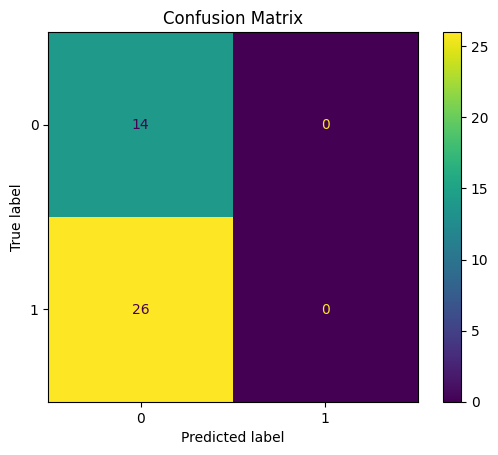

Classification Report:
              precision    recall  f1-score   support

           0       0.35      1.00      0.52        14
           1       0.00      0.00      0.00        26

    accuracy                           0.35        40
   macro avg       0.17      0.50      0.26        40
weighted avg       0.12      0.35      0.18        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_time = (best_model_hm.predict(X_test_hm) > 0.5).astype("int32")

# Calculate test accuracy
test_accuracy_time = accuracy_score(y_test_hm, y_pred_time)
print(f"Test Accuracy: {test_accuracy_time * 100:.2f}%")

# Generate the confusion matrix
conf_matrix_time = confusion_matrix(y_test_hm, y_pred_time)

# Plot the confusion matrix
ConfusionMatrixDisplay(conf_matrix_time).plot(values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
report_time = classification_report(y_test_hm, y_pred_time)
print("Classification Report:")
print(report_time)